In [1]:
# Info:

# Author:
# Date

# Purpose:

# inputs:

# outputs:

# Version control:

#------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import copy

In [3]:
# Import as pandas dataframes
data = pd.read_csv('Cancer_data.csv')

In [4]:
# Get the x and y data
x = data.iloc[:, 2:]
y = pd.DataFrame(data['diagnosis'])

In [ ]:
'''
# fix the nan -------------------------
# method 1: delete the rows
dum = ~np.isnan (data_analysis)
new_data = data_analysis[dum]

# Or get indeses
inds = np.where(np.isfinite(data_analysis[:,0]))
new_data = data_analysis[inds]

# method 2: replace nan with mean
inds2 = np.where(np.isnan(data_analysis[:,0]))

#new_data = data_analysis
new_data = np.copy(data_analysis)

mean_of_col = np.nanmean(new_data, axis=0)

new_data[inds2] = mean_of_col
'''

In [5]:
#-- One hot encoder
from sklearn.preprocessing import LabelEncoder

In [6]:
# encode the target
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)

/Users/daniyarkurmanbayev/miniforge3/envs/globalenv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Feature Scaling
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encode, test_size = 0.2,\
                                                    random_state = 0)

In [9]:
# size/shape of dataframe
n_samples = x_train.shape[0]
n_featuers = x_train.shape[1]

In [10]:
# Make the NN -----------------------------------------------------------------

# Importing the Keras libraries and packages
from keras.layers import Dense
from keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [44]:
# define and initialize the model
my_classifier = Sequential()

# Adding the input layer AND the first hidden layer (Pay attention to this)
my_classifier.add(Dense(units = 100, kernel_initializer = 'uniform',
                        activation = 'sigmoid', input_dim = n_featuers))

# Adding the second hidden layer
my_classifier.add(Dense(units = 100, kernel_initializer = 'uniform',
                                                    activation = 'sigmoid'))

# Adding the third hidden layer
my_classifier.add(Dense(units = 100, kernel_initializer = 'uniform',
                                                    activation = 'sigmoid'))

# Adding the third hidden layer
my_classifier.add(Dense(units = 100, kernel_initializer = 'uniform',
                                                    activation = 'sigmoid'))

# Adding the third hidden layer
my_classifier.add(Dense(units = 100, kernel_initializer = 'uniform',
                                                    activation = 'sigmoid'))

# Adding the last (output) layer
my_classifier.add(Dense(units=1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

# Compiling the ANN
my_classifier.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])

In [ ]:
#my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                      metrics = ['accuracy'])

In [ ]:
#-- plot the model
#from keras.utils import plot_model
#plot_model(my_classifier, to_file='model.png', show_shapes=True)

In [45]:
# Fitting the ANN to the Training set
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

Epoch 1/100


2022-01-13 19:47:36.866088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 1s 16ms/step - loss: 0.6653 - accuracy: 0.6126 - val_loss: 0.6725 - val_accuracy: 0.6044
Epoch 2/100
 1/37 [..............................] - ETA: 0s - loss: 0.5156 - accuracy: 0.9000

2022-01-13 19:47:37.504285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 10ms/step - loss: 0.6539 - accuracy: 0.6456 - val_loss: 0.6723 - val_accuracy: 0.6044
Epoch 3/100
37/37 [==============================] - 0s 11ms/step - loss: 0.6518 - accuracy: 0.6456 - val_loss: 0.6755 - val_accuracy: 0.6044
Epoch 4/100
37/37 [==============================] - 0s 11ms/step - loss: 0.6496 - accuracy: 0.6456 - val_loss: 0.6624 - val_accuracy: 0.6044
Epoch 5/100
37/37 [==============================] - 0s 10ms/step - loss: 0.5608 - accuracy: 0.6456 - val_loss: 0.4497 - val_accuracy: 0.6044
Epoch 6/100
37/37 [==============================] - 0s 10ms/step - loss: 0.3366 - accuracy: 0.9396 - val_loss: 0.2497 - val_accuracy: 0.9780
Epoch 7/100
37/37 [==============================] - 0s 10ms/step - loss: 0.2019 - accuracy: 0.9808 - val_loss: 0.1492 - val_accuracy: 0.9890
Epoch 8/100
37/37 [==============================] - 0s 10ms/step - loss: 0.1457 - accuracy: 0.9808 - val_loss: 0.1026 - val_accuracy: 0.9890
Epoch 9/100
37/37 

In [29]:
# Make predictions
# Predicting the Test set results
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

2022-01-13 19:44:21.073838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [46]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

2022-01-13 19:48:12.162589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[64,  3],
       [ 3, 44]])

In [24]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


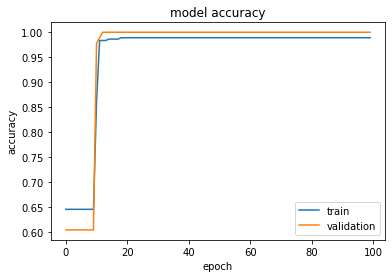

In [25]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

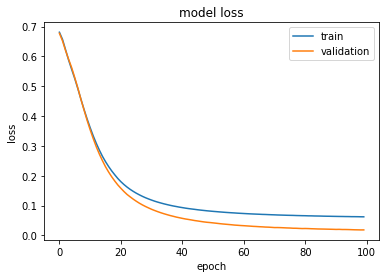

In [26]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()